In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
# Load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [4]:
# load the training and test split of the fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

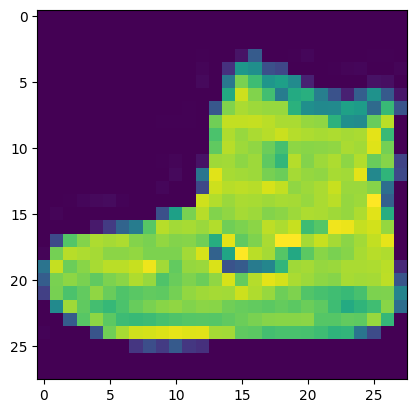

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [6]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax fucntion: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax fucntion: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [9]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4989 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3751 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3384 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3146 - accuracy: 0.8845
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2948 - accuracy: 0.8915


In [10]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8731


[0.3509267270565033, 0.8730999827384949]

# Exercise 1

In [11]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.6211337e-06 3.4755317e-08 4.1763437e-07 1.7634946e-07 4.8209864e-07 3.0242952e-03 1.1533708e-06 3.1830188e-02 6.4921023e-06 9.6513528e-01]


In [12]:
print(test_labels[0])

9


## E1Q1: What does this list represent?

1. It's 10 random meaningless values
2. It's the first 10 classifications that the computer made
3. It's the probability that this item is each of the 10 classes

The Correct answer is (3)

Reason:

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.


## E1Q2: How do you know that this list tells you that the item is an ankle boot?

1. There's not enough information to answer that question
2. The 10th element on the list is the biggest, and the ankle boot is labelled 9
3. The ankle boot is label 9, and there are 0->9 elements in the list

The correct answer is (2)

The Reason:

The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

# Exercise 2

In [13]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics='accuracy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4704 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3569 - accuracy: 0.8709
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3215 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2962 - accuracy: 0.8910
Epoch 5/5
313/313 [==============================] - 2s 7ms/step
[2.4165530e-09 7.6473103e-09 1.8244021e-09 1.9855730e-10 4.8859303e-09 2.8639605e-02 3.8457070e-08 1.3090514e-02 1.7730070e-08 9.5826977e-01]
9


## E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate

The correct answer is (1)

The Reason :
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

# Exercise 3

## E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case?

The Answer:

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [14]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

# Exercise 4

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.

The Answer

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

# Exercise 5

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

The Answer

There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

# Exercise 6

## E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

The Answer:

* try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
* Try 30 epochs -- you might see the loss value decrease more slowly, and sometimes increases. You'll also likely see that the results of model.evaluate() didn't improve much. It can even be slightly worse.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

# Exercise 7

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

The Answer:

The loss increase and accuracy decrease, theres no convergence.

In [16]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 4.6440 - accuracy: 0.7654
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5387 - accuracy: 0.8160
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5033 - accuracy: 0.8294
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5020 - accuracy: 0.8318
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[5.2210764e-21 1.6979722e-15 3.0372762e-25 3.9729634e-17 2.3746598e-21 1.2328206e-03 1.0582113e-15 9.3457606e-03 1.0306999e-18 9.8942149e-01]
9


# Exercise 8

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 60% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.4741 - accuracy: 0.8308
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4741 - accuracy: 0.8308
